In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
#Spotify Client ID and Secret
CLIENT_ID = ''
CLIENT_SECRET = ''

with open("../data/Spotify/spotify_client.txt", "r") as file:
    CLIENT_ID, CLIENT_SECRET = file.read().strip().split()

In [3]:
auth_response = requests.post(
    'https://accounts.spotify.com/api/token',
    data = {
        'grant_type': 'client_credentials',
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET
    }
)

auth_data = auth_response.json()
access_token = auth_data['access_token']

# Read File

In [4]:
# Encoding ISO-8859-1 to read Spotify data
# Read updated file if present, else, query original
file_path = './updated_spotify_2023_file.csv'
data = ''

try:
    # Attempt to read the CSV file
    data = pd.read_csv(file_path, encoding='ISO-8859-1')

    # Check if the DataFrame is empty
    if data.empty:
        print("The CSV file is empty.")
except FileNotFoundError:
    # Handle the case where the file is not found
    print(f"The file '{file_path}' is not available. Using the orignal file")
    data = pd.read_csv('../data/Spotify/spotify-2023.csv', encoding = 'ISO-8859-1')
except Exception as e:
    # Handle other exceptions
    print(f"An error occurred: {e}")

data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b273781904...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,https://i.scdn.co/image/ab67616d0000b273e0b60c...


# Enrichment Data **ONLY RUN IF ENRICHED DATA IS NOT DONE**

In [5]:
image_data = ''

# Get track id, image and artist name
for i, row in data.iterrows():
    track_name = row['track_name']
    artist_name = row['artist(s)_name']
    
    query = f"{track_name} artist:{artist_name}"
    headers = {'Authorization': f"Bearer {access_token}"}
    
    # Get track data
    search_response = requests.get(f"https://api.spotify.com/v1/search?q={query}&type=track", headers=headers)
#     print (search_response)
#     break
    search_data = search_response.json()
    
    try:
        track = search_data['tracks']['items'][0]
        track_id = track['id']
        
        if track_id:
            # Search for track cover image
            cover_url = f"https://api.spotify.com/v1/tracks/{track_id}"
            response = requests.get(cover_url, headers= headers)
            json_data = response.json()
    #         print (json_data)
    #         break
    #         try:
            image_data = json_data['album']['images'][0]['url']
    #         except (KeyError, IndexError):
    #             data.at[i,'image_url'] = 'Not Found'
        
    except (KeyError, IndexError):
        data.at[i,'image_url'] = 'Not Found'
        
    data.at[i, 'image_url'] = image_data
                                   
data['image_url']

In [6]:
# save back to an excel file
data.to_csv('updated_spotify_2023_file.csv', index=False)

# Data Preprocessing

In [5]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


* As can be seen, the mean release date is 2018, but the vast marjority are released from 2020 to 2022
* The mean bpm is 122, dace_ability_% at 67% and energy_% at 64% suggesting Spotify audiences prefer high tempo dynamic songs
* With artist_count average slightly higher than 1.5, it suggests collab songs or group songs are more popular than solo

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Summary of required changes:
* **artist_count** is number of artists performed in a song. Should be **categories**
* **streams** is number of time a song is streamed. Should be **integer**
* **key**, **mode** should be converted into **categories**. If requires **KNN Imputer**, label too
* **in_shazam_charts** should be converted into **integer**

In [7]:
data['artist_count'] = data['artist_count'].astype('category')
data['key'] = data['key'].astype('category')
data['mode'] = data['mode'].astype('category')

# In the values of in_shazam_charts, we have things like '1,021', so it has to be handle to convert
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'].str.replace(',', ''), errors='coerce').astype('Int64')
data['streams'] = data['streams'].astype('Int64')

data

ValueError: invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

As can be seen above, there is error in the streams column, where it should have been integer instead of string format value of other columns. Process to remove it.

In [8]:
# Identify rows with non-numeric values (~) in the 'streams' column
non_numeric_rows = data[~pd.to_numeric(data['streams'], errors='coerce').notna()]

# Save the non-numeric rows to a new DataFrame
non_numeric_df = pd.DataFrame(non_numeric_rows)

# Drop the non-numeric rows from the original DataFrame
data = data[pd.to_numeric(data['streams'], errors='coerce').notna()]
data['streams'] = data['streams'].astype('Int64')

non_numeric_df

C:\Users\vieth\AppData\Local\Temp\ipykernel_19624\565259321.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['streams'] = data['streams'].astype('Int64')


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,https://i.scdn.co/image/ab67616d0000b2739a0011...


Since there is only 1 row with faulty data, we can simply ignore it

In [9]:
# check for NA
data.isna().any()

track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
image_url                True
dtype: bool

* in_shazam_charts, key and image_url have NA value.
* except for image_url where it is not fetchable from Spotify API, the rest can be mapped with K-NN
* we can ignore the image_url.

In [10]:
print ("Number of NA value for in_shazam_charts: ", data['in_shazam_charts'].isna().sum())
print ("Number of NA value for in_shazam_charts: ", data['key'].isna().sum())

Number of NA value for in_shazam_charts:  50
Number of NA value for in_shazam_charts:  95


Since we have 953 entries in total, having 95+50=145 NA values is a significant portion. It means we cannot drop NA values and I think it is suitable to fill in with K-NN strategies.

In [11]:
data['key'].unique()

['B', 'C#', 'F', 'A', 'D', ..., 'G#', 'G', 'E', 'A#', 'D#']
Length: 12
Categories (11, object): ['A', 'A#', 'B', 'C#', ..., 'F', 'F#', 'G', 'G#']

In [12]:
len(data['in_shazam_charts'].unique())

199

In [13]:
data['in_shazam_charts'].unique()

<IntegerArray>
[826, 382, 949, 548, 425, 946, 418, 194, 953, 339,
 ...
  70, 206, 114, 128, 353, 101, 141, 198,  68,  95]
Length: 199, dtype: Int64

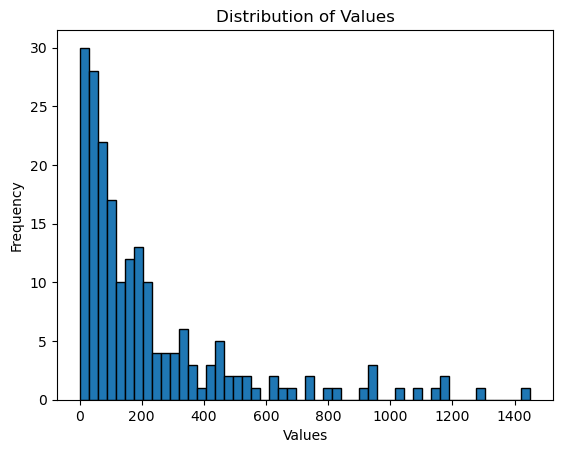

In [14]:
import matplotlib.pyplot as plt

# Convert strings to numeric values, handling NaN
numeric_data = pd.to_numeric(data['in_shazam_charts'].unique(), errors='coerce')

# Plot histogram
plt.hist(numeric_data[~np.isnan(numeric_data)], bins=50, edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

* We have 12 keys here, so we can group it by 12 neighbours

* Since there are literaly 199 unique values, it does not make sense to have that much k-neighbours
* From the distribution, we can group it by ~5 groups: 0-99, 100-199, 200-299, 300-499, 500+

In [15]:
from sklearn.impute import KNNImputer

# Extract columns for KNN imputation, since it is 2 separate independent of each other columns, we have to do it twice
knn_cols = ['in_shazam_charts', 'key']

# From the distribution, it seems we can group into 5 groups
knn_imputer = KNNImputer(n_neighbors=5)
data['in_shazam_charts'] = pd.DataFrame(knn_imputer.fit_transform(data[['in_shazam_charts']]), columns=['in_shazam_charts'])['in_shazam_charts']

data['in_shazam_charts']

C:\Users\vieth\AppData\Local\Temp\ipykernel_19624\2853898386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['in_shazam_charts'] = pd.DataFrame(knn_imputer.fit_transform(data[['in_shazam_charts']]), columns=['in_shazam_charts'])['in_shazam_charts']


0      826.0
1      382.0
2      949.0
3      548.0
4      425.0
       ...  
948      0.0
949      0.0
950      0.0
951      0.0
952      NaN
Name: in_shazam_charts, Length: 952, dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder

# We have to encode label keys first
key_encoder = LabelEncoder()
data['key'] = key_encoder.fit_transform(data['key'])

# We have 12 keys here, so we can group it by 12 neighbours
knn_imputer = KNNImputer(n_neighbors=12)
data['key'] = pd.DataFrame(knn_imputer.fit_transform(data[['key']]), columns=['key'])['key']

data['key']

C:\Users\vieth\AppData\Local\Temp\ipykernel_19624\875942929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key'] = key_encoder.fit_transform(data['key'])
C:\Users\vieth\AppData\Local\Temp\ipykernel_19624\875942929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['key'] = pd.DataFrame(knn_imputer.fit_transform(data[['key']]), columns=['key'])['key']


0      2.0
1      3.0
2      7.0
3      0.0
4      0.0
      ... 
948    8.0
949    3.0
950    3.0
951    6.0
952    NaN
Name: key, Length: 952, dtype: float64

In [17]:
# double check
print ("Number of NA value for in_shazam_charts: ", data['in_shazam_charts'].isna().sum())
print ("Number of NA value for in_shazam_charts: ", data['key'].isna().sum())

data

Number of NA value for in_shazam_charts:  1
Number of NA value for in_shazam_charts:  1


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,2.0,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,3.0,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,7.0,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,0.0,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,0.0,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,8.0,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b273781904...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,3.0,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,3.0,Major,80,81,67,4,0,8,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,6.0,Major,82,67,77,8,0,12,5,https://i.scdn.co/image/ab67616d0000b273e0b60c...


In [18]:
# Drop last row since in both cases, it is the only null value
data = data.drop(952)

data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,image_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,2.0,Major,80,89,83,31,0,8,4,NaN
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,3.0,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,7.0,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,0.0,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,0.0,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,The Great War,Taylor Swift,1,2022,10,21,1274,0,181382590,1,...,0.0,Major,57,55,74,22,0,8,4,https://i.scdn.co/image/ab67616d0000b273e0b60c...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,8.0,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b273781904...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,3.0,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,3.0,Major,80,81,67,4,0,8,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...


In [23]:
# save back to an excel xlsx file
data.to_csv('final_spotify_2023_file.csv', index=False)
data.to_excel('./final_spotify_2023_file.xlsx', index=False)

# Machine Learning Models

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            951 non-null    object  
 1   artist(s)_name        951 non-null    object  
 2   artist_count          951 non-null    category
 3   released_year         951 non-null    int64   
 4   released_month        951 non-null    int64   
 5   released_day          951 non-null    int64   
 6   in_spotify_playlists  951 non-null    int64   
 7   in_spotify_charts     951 non-null    int64   
 8   streams               951 non-null    Int64   
 9   in_apple_playlists    951 non-null    int64   
 10  in_apple_charts       951 non-null    int64   
 11  in_deezer_playlists   951 non-null    object  
 12  in_deezer_charts      951 non-null    int64   
 13  in_shazam_charts      951 non-null    float64 
 14  bpm                   951 non-null    int64   
 15  key   

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Drop non-numeric columns and columns like "image_url" that are not useful for prediction
df = data[['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
       'liveness_%', 'speechiness_%']]

# Assuming 'streams' is the column to base viral_probability on
percentile_25 = data['streams'].quantile(0.25)
percentile_50 = data['streams'].quantile(0.50)
percentile_75 = data['streams'].quantile(0.75)
# percentile_90 = data['streams'].quantile(0.90)

# Create 'viral_probability' column
df['viral_probability'] = pd.cut(data['streams'], bins=[0, percentile_25, percentile_50, percentile_75, #percentile_90,
                                                      float('inf')], labels=[0.25, 0.50, 0.75, 0.9], include_lowest=True) #0.9


# One-hot encode categorical columns 'key' and 'mode'
df = pd.get_dummies(df, columns=['key', 'mode'])


# Split the dataset into features (X) and target variable (y)
X = df.drop("viral_probability", axis=1)
y = df["viral_probability"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

C:\Users\vieth\AppData\Local\Temp\ipykernel_19624\3996061392.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['viral_probability'] = pd.cut(data['streams'], bins=[0, percentile_25, percentile_50, percentile_75, #percentile_90,


,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_0.0,key_1.0,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_Major,mode_Minor
318,110,81,64,79,5,0,31,3,0,0,...,0,0,0,0,0,0,1,0,0,1
545,94,57,36,58,5,0,15,3,0,0,...,1,0,0,0,0,0,0,0,1,0
557,88,56,58,55,35,0,23,11,0,0,...,1,0,0,0,0,0,0,0,0,1
109,108,61,47,68,0,0,13,3,0,0,...,1,0,0,0,0,0,0,0,0,1
77,131,71,24,47,1,0,27,9,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,116,80,92,80,4,0,10,3,0,0,...,0,0,0,0,0,0,0,0,1,0
270,96,72,40,47,71,0,13,4,0,0,...,1,0,0,0,0,0,0,0,1,0
861,154,70,97,62,47,0,10,4,0,0,...,0,0,1,0,0,0,0,0,0,1
435,85,65,36,47,31,0,12,10,0,0,...,0,0,0,1,0,0,0,0,0,1


In [63]:
y_train

E:\Anaconda\lib\site-packages\IPython\lib\pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


318    0.50
545    0.75
557    0.25
109    0.90
77     0.90
       ... 
106    0.90
270    0.50
861    0.50
435    0.50
102    0.50
Name: viral_probability, Length: 760, dtype: category
Categories (4, float64): [0.25 < 0.50 < 0.75 < 0.90]

Random Forest

In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


# Initialize the XGBClassifier
xgb_model = XGBClassifier()

# Define hyperparameter grid for fine-tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Use GridSearchCV for fine-tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
324 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "E:\Anaconda\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [0.25 0.5  0.75 0.9 ]

  warnings.warn(so

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [0.25 0.5  0.75 0.9 ]

Neural Network

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_train.values, dtype=torch.float32)
X_test_nn = torch.tensor(X_test, dtype=torch.float32)
y_test_nn = torch.tensor(y_test.values, dtype=torch.float32)

# Define a simple neural network
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Initialize the model
input_size = X_train_nn.shape[1]
model = NeuralNetwork(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 10
batch_size = 256

for epoch in range(epochs):
    for i in range(0, len(X_train_nn), batch_size):
        batch_X = X_train_nn[i:i+batch_size]
        batch_y = y_train_nn[i:i+batch_size]

        # Forward pass
        output = model(batch_X)
        loss = criterion(output, batch_y.view(-1, 1))

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    predictions = model(X_test_nn)
#     print (predictions)
    predictions = torch.where(predictions <= 0.3, torch.tensor(0.25), predictions)
    predictions = torch.where((predictions > 0.3) & (predictions <= 0.55), torch.tensor(0.5), predictions)
    predictions = torch.where((predictions > 0.55) & (predictions <= 0.85), torch.tensor(0.75), predictions)
    predictions = torch.where(predictions > 0.85, torch.tensor(0.9), predictions)
#     print (predictions)

accuracy = np.mean(predictions.numpy() == y_test_nn.numpy())
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.2566267372056687
